# Assignment 2

The topic of our data is `Understanding electrical energy use in the home`. 

We got three CSV tabular files from data holders including measured data, inferred data and basic information of households. Measured data and inferred data have seven same columns. However, inferred data use ML algorithms based on the whole house electricity data or measured using an appliance monitor in the home, and its data is too large to upload to Notable. Therefore, I use the measured data for this assignment only. For the basic information of households file, it contains the information about home id for inference.

After discussion, our group members devided the data into three category by topic (also considering the size of the data):
1. the data in kitchen(including the data from electronic hob, electronic oven, kettle, microwave, toaster and grill) 
2. the data of clean appliances (including dish washer, tumble drier, vacuum cleaner, washing machine and washing machine tumbledrier)
3. the shower data (large part of the whole data) and other remaining data (including the data from electronic heater and dehumidifier)

I am more interesting in the shower data. Thus I will use the third part of the data for this assignment.

In [156]:
import pandas as pd
import numpy as np

In [157]:
measured_data = pd.read_csv("measured_bams_one_years.csv")
home_data = pd.read_csv("home_details.csv")

In [158]:
measured_data = measured_data.copy()
home_data = home_data.copy() 

## Part 1 - Describe ( with Cleaning Data)

### 1. The General Type of The Data

From the first 5 rows of these two data we can know these data are `tabulars`.

In [159]:
measured_data.head()

,useid,homeid,appliancetype,applianceid,starttime,endtime,watthoursused,type
0,627720,63,kettle,1019,06/07/2017 16:50,06/07/2017 16:52,84,measured
1,627721,63,kettle,1019,06/07/2017 20:35,06/07/2017 20:36,56,measured
2,627722,63,kettle,1019,06/07/2017 20:38,06/07/2017 20:39,51,measured
3,627723,63,kettle,1019,07/07/2017 15:45,07/07/2017 15:47,73,measured
4,627724,63,kettle,1019,07/07/2017 20:18,07/07/2017 20:19,96,measured


In [160]:
home_data.head()

,homeid,stdinstalltime,residents,ageband1,ageband2,ageband3,ageband4,studyperiod_end_time,income_YEARLY_band_low,income_YEARLY_band_high,income_YEARLY_band_midpoint,equivalised_income_YEARLY_midpoint,single_occ,above_med_equiv_income
0,47,10/08/2016 00:00,2.0,25-29,20-24,NaN,NaN,08/05/2017 09:00,NaN,NaN,NaN,NaN,FALSE,Missing income data
1,59,06/10/2016 00:00,2.0,30-34,30-34,0-4,NaN,28/01/2018 07:56,90000.0,104999.0,97499.5,54166.38889,FALSE,TRUE
2,61,06/10/2016 00:00,2.0,50-54,55-59,NaN,NaN,19/10/2017 07:00,48600.0,53999.0,51299.5,34199.66667,FALSE,TRUE
3,62,26/08/2016 00:00,2.0,30-34,30-34,NaN,NaN,31/12/2018 23:59,43200.0,48599.0,45899.5,30599.66667,FALSE,TRUE
4,63,28/10/2016 00:00,2.0,40-44,35-39,NaN,NaN,31/12/2018 23:59,54000.0,65999.0,59999.5,39999.66667,FALSE,TRUE


In [161]:
a2 = {}.fromkeys(measured_data['appliancetype']).keys()
a2

dict_keys(['kettle', 'microwave', 'washingmachinetumbledrier', 'dishwasher', 'vacuumcleaner', 'washingmachine', 'electricoven', 'electricshower', 'electrichob', 'toaster', 'electricheater', 'grill', 'dehumidifier', 'tumbledrier'])

In [162]:
a = ['kettle', 'microwave', 'washingmachinetumbledrier', 'dishwasher', 'vacuumcleaner', 'washingmachine', 'electricoven', 'electricshower', 'electrichob', 'toaster', 'electricheater', 'grill', 'dehumidifier', 'tumbledrier']
len(a)

14

In [163]:
a2 = {}.fromkeys(home_data['homeid']).keys()
a2

dict_keys([47, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 109, 110, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280

In [164]:
a = [47, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 109, 110, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 313, 315, 316, 317, 318, 319, 320, 321, 322, 323, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335]
len(a)

257

### Extra. Data Cleaning

**[Data Cleaning 1]** In the measured data the type of `starttime` and `endtime` columns should be timestamp. 

In [165]:
import re
import datetime as dt
import time
import calendar

def timeconvert(time):
    timelist=[]
    for a in time:
        zero = re.compile(',0')
        new_zero = zero.sub(',',a)
        slash = re.compile('/')
        new_slach = slash.sub(',',new_zero)
        colon = re.compile(':')
        new_colon = colon.sub(',',new_slach)
        space = re.compile(' ')
        new_space = space.sub(',',new_colon)

        if int(new_space[0])>0:
            newlist = new_space
        else:
            newlist = new_space[1:]
            
        timelist.append(newlist)
    timeSer = pd.Series(timelist)
    return timeSer

a = measured_data['starttime']
measured_data.loc[:,'starttime'] = timeconvert(a)
b = measured_data['endtime']
measured_data.loc[:,'endtime'] = timeconvert(b)

def timestamp(time):
    timelist=[]
    for a in time:
        format = '%d,%m,%Y,%H,%M'
        date = dt.datetime.strptime(a,format) 
        ts = calendar.timegm(date.timetuple())
        timelist.append(ts)
    timestamp = pd.Series(timelist)
    return timestamp

a = measured_data['starttime']
measured_data.loc[:,'starttime'] = timestamp(a)
b = measured_data['endtime']
measured_data.loc[:,'endtime'] = timestamp(b)

**[Data Cleaning 2]** Also dose the `stdinstalltime` and `studyperiod_end_time` in the basic information of household should be timestamp.

In [166]:
a = home_data['stdinstalltime']
home_data.loc[:,'stdinstalltime'] = timeconvert(a)
b = home_data['studyperiod_end_time']
home_data.loc[:,'studyperiod_end_time'] = timeconvert(b)

a = home_data['stdinstalltime']
home_data.loc[:,'stdinstalltime'] = timestamp(a)
b = home_data['studyperiod_end_time']
home_data.loc[:,'studyperiod_end_time'] = timestamp(b)

**[Data Cleaning 3]** the age band should be matched to the number of residents. (eg. if there are two numbers in the house, the age band should have values in two columns. And also appear `Oct` and `Sep` in the data.

In [167]:
home_data[home_data['residents']==1][home_data[home_data['residents']==1]['ageband2'].notnull()]

,homeid,stdinstalltime,residents,ageband1,ageband2,ageband3,ageband4,studyperiod_end_time,income_YEARLY_band_low,income_YEARLY_band_high,income_YEARLY_band_midpoint,equivalised_income_YEARLY_midpoint,single_occ,above_med_equiv_income
62,128,1498123500,1.0,40-44,40-44,NaN,NaN,1546300740,23400.0,26999.0,25199.5,16799.66667,TRUE,FALSE
193,268,1512721680,1.0,40-44,40-44,NaN,NaN,1546300740,27000.0,32399.0,29699.5,19799.66667,TRUE,FALSE
245,323,1521809760,1.0,60-64,60-64,NaN,NaN,1546300740,19800.0,23399.0,21599.5,14399.66667,TRUE,FALSE


In [168]:
home_data.iloc[62,4]='NaN'
home_data.iloc[193,4]='NaN'
home_data.iloc[245,4]='NaN'

In [169]:
home_data[home_data['residents']==2][home_data[home_data['residents']==2]['ageband3'].notnull()]

,homeid,stdinstalltime,residents,ageband1,ageband2,ageband3,ageband4,studyperiod_end_time,income_YEARLY_band_low,income_YEARLY_band_high,income_YEARLY_band_midpoint,equivalised_income_YEARLY_midpoint,single_occ,above_med_equiv_income
1,59,1475712000,2.0,30-34,30-34,0-4,NaN,1517126160,90000.0,104999.0,97499.5,54166.38889,FALSE,TRUE
49,114,1497339180,2.0,30-34,30-34,30-34,NaN,1546300740,4200.0,5399.0,4799.5,2399.75000,FALSE,FALSE
97,167,1472000400,2.0,25-29,30-34,0-4,NaN,1528965000,48600.0,53999.0,51299.5,28499.72222,FALSE,TRUE
160,235,1509698220,2.0,35-39,30-34,30-34,NaN,1546300740,90000.0,104999.0,97499.5,48749.75000,FALSE,TRUE


In [170]:
home_data.iloc[49,5]='NaN'
home_data.iloc[160,5]='NaN'

There may be 3 residents in row 1 and row 49 accroding the column `ageband3`.

In [171]:
home_data.iloc[1,2]=3
home_data.iloc[97,2]=3

In [172]:
home_data[home_data['residents']==3][home_data[home_data['residents']==3]['ageband4'].notnull()]

,homeid,stdinstalltime,residents,ageband1,ageband2,ageband3,ageband4,studyperiod_end_time,income_YEARLY_band_low,income_YEARLY_band_high,income_YEARLY_band_midpoint,equivalised_income_YEARLY_midpoint,single_occ,above_med_equiv_income
7,66,1479859200,3.0,30-34,35-39,0-4,0-4,1530399540,66000.0,77999.0,71999.5,34285.47619,FALSE,TRUE


In [173]:
home_data.iloc[7,6]='NaN'

In [174]:
home_data[home_data['residents']==4][home_data[home_data['residents']==4]['ageband4'].isnull()]

,homeid,stdinstalltime,residents,ageband1,ageband2,ageband3,ageband4,studyperiod_end_time,income_YEARLY_band_low,income_YEARLY_band_high,income_YEARLY_band_midpoint,equivalised_income_YEARLY_midpoint,single_occ,above_med_equiv_income
169,244,1510146000,4.0,35-39,40-44,0-4,NaN,1530403140,19800.0,23399.0,21599.5,11999.72222,FALSE,FALSE
188,263,1512550200,4.0,30-34,35-39,05-Sep,NaN,1546300740,32400.0,37799.0,35099.5,19499.72222,FALSE,FALSE
238,316,1521188700,4.0,50-54,45-49,15-19,NaN,1530399540,105000.0,119999.0,112499.5,56249.75000,FALSE,TRUE
246,325,1522223820,4.0,45-49,NaN,NaN,NaN,1530399540,78000.0,89999.0,83999.5,83999.50000,FALSE,TRUE
247,326,1522237920,4.0,35-39,NaN,NaN,NaN,1546300740,16200.0,19799.0,17999.5,17999.50000,FALSE,FALSE
256,335,1525095720,4.0,30-34,35-39,NaN,NaN,1538002740,78000.0,89999.0,83999.5,55999.66667,FALSE,TRUE


From the tabular above, there some incorrect number in the column of `residents`.

In [175]:
home_data.iloc[169,2]=3
home_data.iloc[188,2]=3
home_data.iloc[238,2]=3
home_data.iloc[256,2]=3

In [176]:
home_data[home_data['residents']==4][home_data[home_data['residents']==4]['ageband4'].isnull()]

,homeid,stdinstalltime,residents,ageband1,ageband2,ageband3,ageband4,studyperiod_end_time,income_YEARLY_band_low,income_YEARLY_band_high,income_YEARLY_band_midpoint,equivalised_income_YEARLY_midpoint,single_occ,above_med_equiv_income
246,325,1522223820,4.0,45-49,NaN,NaN,NaN,1530399540,78000.0,89999.0,83999.5,83999.5,FALSE,TRUE
247,326,1522237920,4.0,35-39,NaN,NaN,NaN,1546300740,16200.0,19799.0,17999.5,17999.5,FALSE,FALSE


There is conflict in row 246 and the row 247. In these two rows, the column `single_occ` shows that there are more than one person have income while in the columns of age bands it only appear one person's data. Therefore, there are some missing data.

In [177]:
home_data.iloc[246,4:7]='Missing ageband data'
home_data.iloc[247,4:7]='Missing ageband data'

In the column of residents, There are also missing some value.

In [178]:
home_data[home_data['residents'].isnull()]

,homeid,stdinstalltime,residents,ageband1,ageband2,ageband3,ageband4,studyperiod_end_time,income_YEARLY_band_low,income_YEARLY_band_high,income_YEARLY_band_midpoint,equivalised_income_YEARLY_midpoint,single_occ,above_med_equiv_income
101,171,1501756080,NaN,65-69,NaN,NaN,NaN,1530399540,13500.0,16199.0,14849.5,14849.5,Missing occupancy data,FALSE
117,187,1504522620,NaN,55-59,NaN,NaN,NaN,1546300740,27000.0,32399.0,29699.5,29699.5,Missing occupancy data,TRUE
145,219,1508159100,NaN,30-34,NaN,NaN,NaN,1521810000,78000.0,89999.0,83999.5,83999.5,Missing occupancy data,TRUE
153,228,1509091200,NaN,35-39,NaN,NaN,NaN,1546300740,66000.0,77999.0,71999.5,71999.5,Missing occupancy data,TRUE
196,271,1513244460,NaN,40-44,NaN,NaN,NaN,1546300740,48600.0,53999.0,51299.5,51299.5,Missing occupancy data,TRUE


In [179]:
home_data.iloc[101,2]=1
home_data.iloc[117,2]=1
home_data.iloc[145,2]=1
home_data.iloc[153,2]=1
home_data.iloc[196,2]=1

`Oct-14` and `5-Sep` in the column`ageband2`and `ageband3`could be the range (`10-14` and `5-9`) respectively. Next step is replace all of these in a correct way.

In [180]:
home_data = home_data.replace({'05-Sep':'5-9','Oct-14':'10-14'})

**[Data Cleaning 4]** From the description of data owners, the last two columns in the basic information of householders are Boolean, but from the structure of the data there are two objects. Thus, it should be replaced.

In [181]:
isTrue = home_data['single_occ'] == 'TRUE'
isFalse = home_data['single_occ'] == 'FALSE'
isTrue = home_data['above_med_equiv_income'] == 'TRUE'
isFalse = home_data['above_med_equiv_income'] == 'FALSE'

In [182]:
measured_data['usingtime(mins)'] = (measured_data['endtime']-measured_data['starttime'])/60

shower_data = measured_data[measured_data['appliancetype'] == 'electricshower']
heater_data = measured_data[measured_data['appliancetype'] == 'electricheater']
dehumidifier_data = measured_data[measured_data['appliancetype'] == 'dehumidifier']

shower_data = shower_data.copy()
heater_data = heater_data.copy()
dehumidifier_data = dehumidifier_data.copy()

### 2. How Large and Complext is It

#### a) Rows/Colums
- shower data have 1360 rows and 8 columns
- heater data have 188 rows and 8 columns
- dehumidifier data have 135 rows and 8 columns
- the basic information of householders have 257 rows and 14 columns.

In [183]:
measured_data.shape

(33513, 9)

In [184]:
shower_data.shape

(1360, 9)

In [185]:
heater_data.shape

(188, 9)

In [186]:
dehumidifier_data.shape

(135, 9)

In [187]:
home_data.shape

(257, 14)

#### b) Size and Structure
We can see the size and structure information of data as follow:

In [188]:
measured_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33513 entries, 0 to 33512
Data columns (total 9 columns):
useid              33513 non-null int64
homeid             33513 non-null int64
appliancetype      33513 non-null object
applianceid        33513 non-null int64
starttime          33513 non-null int64
endtime            33513 non-null int64
watthoursused      33513 non-null int64
type               33513 non-null object
usingtime(mins)    33513 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 2.3+ MB


In [189]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 14 columns):
homeid                                257 non-null int64
stdinstalltime                        257 non-null int64
residents                             257 non-null float64
ageband1                              257 non-null object
ageband2                              205 non-null object
ageband3                              107 non-null object
ageband4                              51 non-null object
studyperiod_end_time                  257 non-null int64
income_YEARLY_band_low                247 non-null float64
income_YEARLY_band_high               243 non-null float64
income_YEARLY_band_midpoint           243 non-null float64
equivalised_income_YEARLY_midpoint    243 non-null float64
single_occ                            257 non-null object
above_med_equiv_income                257 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 28.2+ KB


#### c) Variation

In [190]:
shower_data.var()

useid              2.119159e+08
homeid             4.884393e+03
applianceid        1.174989e+06
starttime          5.947702e+13
endtime            5.947723e+13
watthoursused      5.297412e+05
usingtime(mins)    2.079746e+01
dtype: float64

In [191]:
home_data.var()

homeid                                6.428261e+03
stdinstalltime                        1.492250e+14
residents                             1.200906e+00
studyperiod_end_time                  1.147253e+14
income_YEARLY_band_low                5.993565e+08
income_YEARLY_band_high               6.915122e+08
income_YEARLY_band_midpoint           5.970975e+08
equivalised_income_YEARLY_midpoint    2.628236e+08
dtype: float64

### 3. What Fields and Data Types are Present

#### a) Max/Min
The maximum and minimum of `the measured data`:

In [192]:
measured_data.max()

useid                                 688592
homeid                                   328
appliancetype      washingmachinetumbledrier
applianceid                             5447
starttime                         1530398520
endtime                           1530402360
watthoursused                        1875098
type                                measured
usingtime(mins)                        21038
dtype: object

In [193]:
measured_data.min()

useid                    627720
homeid                       61
appliancetype      dehumidifier
applianceid                 940
starttime            1498888680
endtime              1498888860
watthoursused                 0
type                   measured
usingtime(mins)               0
dtype: object

The maximum and minimum of `the basic information of households`:

In [194]:
home_data.max()

homeid                                       335
stdinstalltime                        1525095720
residents                                      5
ageband1                                     80+
studyperiod_end_time                  1546300740
income_YEARLY_band_low                    120000
income_YEARLY_band_high                   119999
income_YEARLY_band_midpoint               112500
equivalised_income_YEARLY_midpoint       97499.5
single_occ                                  TRUE
above_med_equiv_income                      TRUE
dtype: object

In [195]:
home_data.min()

homeid                                        47
stdinstalltime                        1470787200
residents                                      1
ageband1                                   15-19
studyperiod_end_time                  1491771600
income_YEARLY_band_low                         0
income_YEARLY_band_high                      600
income_YEARLY_band_midpoint                  300
equivalised_income_YEARLY_midpoint           200
single_occ                                 FALSE
above_med_equiv_income                     FALSE
dtype: object

#### b) Levels for Categorical Values

The levels for categorial values of `the measured data`:

In [196]:
measured_data.median()

useid              6.621010e+05
homeid             1.460000e+02
applianceid        2.089000e+03
starttime          1.518869e+09
endtime            1.518870e+09
watthoursused      7.200000e+01
usingtime(mins)    3.000000e+00
dtype: float64

In [197]:
measured_data.median()

useid              6.621010e+05
homeid             1.460000e+02
applianceid        2.089000e+03
starttime          1.518869e+09
endtime            1.518870e+09
watthoursused      7.200000e+01
usingtime(mins)    3.000000e+00
dtype: float64

The levels for categorial values of `the basic information of house holders`:

In [198]:
home_data.mean()

homeid                                1.984241e+02
stdinstalltime                        1.504508e+09
residents                             2.443580e+00
studyperiod_end_time                  1.538665e+09
income_YEARLY_band_low                4.340648e+04
income_YEARLY_band_high               4.922987e+04
income_YEARLY_band_midpoint           4.568777e+04
equivalised_income_YEARLY_midpoint    2.936361e+04
dtype: float64

In [199]:
home_data.median()

homeid                                2.000000e+02
stdinstalltime                        1.506598e+09
residents                             2.000000e+00
studyperiod_end_time                  1.546301e+09
income_YEARLY_band_low                4.320000e+04
income_YEARLY_band_high               4.859900e+04
income_YEARLY_band_midpoint           4.589950e+04
equivalised_income_YEARLY_midpoint    2.699967e+04
dtype: float64

### 4. Links between These Two Data

From the first 5 rows of these two data, 'homeid' is the only link between these two data.

### 5. Summary statistics about the data

In [200]:
sum(home_data['residents'])

628.0

These two data contains 33513 records of 14 kinds of appliances from 628 residents of 257 different homes over a year from 1 July 2017 to 30 June 2018. In my part of group work, There are 1360 rows of shower data, 188 rows of heater data, and 135 rows of dehumidifiers. 

In the measured data of different use ID, it has the information about:

- useid
- homeid
- appliance type
- start time & end time 
- watt-hour used

In the home data of different home ID, it has infomation about:

- homeid
- residents number
- age band
- start installed time & end time 
- income

## Part 2 - Explore

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline      
sns.set(style="darkgrid")

### Exploratory Visualisations - 1
The distribution of energy usage which collected from electric shower.

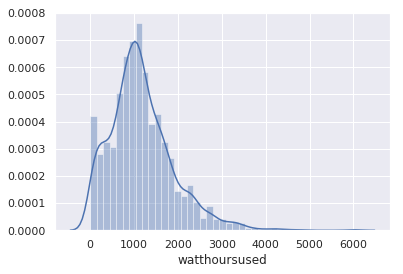

In [203]:
sns.distplot(shower_data['watthoursused'])
plt.show()

The plot above may related the distribution of shower time.

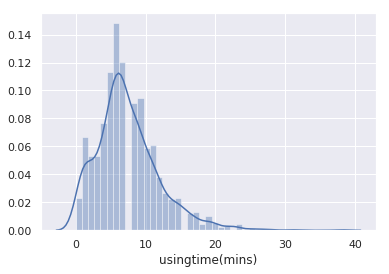

In [204]:
sns.distplot(shower_data['usingtime(mins)'])
plt.show()

#### What I Found：

There is positive skew in the distribution of watthoursused. The shower time are related with the energy which the participants used.

### Exploratory Visualisations - 2
The plot shows the time using heater changed with time.

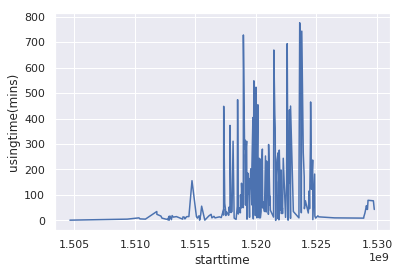

In [205]:
ax = sns.lineplot( x='starttime', y="usingtime(mins)",data=heater_data)
plt.show()

#### What I Found：
The heater is used frequency in a period from around January to Appril.

### Exploratory Visualisations - 3
the residents nambers in a home may have relationship with the average energy they used in shower.

In [206]:
a2 = {}.fromkeys(shower_data['homeid']).keys()
a2

dict_keys([65, 90, 162, 175, 208, 225, 228, 227, 231, 249, 266, 259, 311, 73, 106, 145, 171])

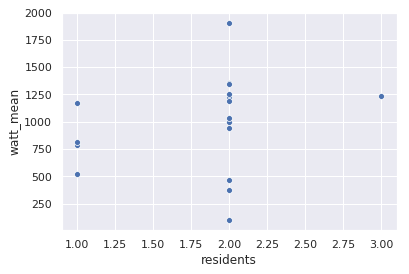

In [207]:
home_data['watt_mean']='NaN'
# home_data[home_data['homeid']==65]
# home_data.iloc[6,14]=b  
a = [65, 90, 162, 175, 208, 225, 228, 227, 231, 249, 266, 259, 311, 73, 106, 145, 171]
for x in a:
    a = shower_data[shower_data['homeid']==x]
    b = a['watthoursused'].mean()
    home_data.loc[home_data['homeid'] == x,'watt_mean'] = b

b = home_data[home_data['watt_mean']!='NaN']
sns.scatterplot(x='residents', y='watt_mean', data= b)

In [208]:
a = home_data[home_data['watt_mean']!='NaN']
b = a[a['residents']==2]
b[b['watt_mean']<250]

,homeid,stdinstalltime,residents,ageband1,ageband2,ageband3,ageband4,studyperiod_end_time,income_YEARLY_band_low,income_YEARLY_band_high,income_YEARLY_band_midpoint,equivalised_income_YEARLY_midpoint,single_occ,above_med_equiv_income,watt_mean
184,259,1512987420,2.0,25-29,25-29,NaN,NaN,1546300740,23400.0,26999.0,25199.5,16799.66667,FALSE,FALSE,98


In [209]:
shower_data[shower_data['homeid']==259]

,useid,homeid,appliancetype,applianceid,starttime,endtime,watthoursused,type,usingtime(mins)
24746,674244,259,electricshower,4143,1530178500,1530178560,98,measured,1.0


#### What I Found:
Only three home's average energy of shower are below 500, and these three family are all containing 2 members.
For the outliers which average of energy below 250, there are only one recorde of their home. Thus, this home may missing some data.
This plot should be shown in the format of boxplot, however, it only can show in the scatterplot format, since there are few data to show in that way.


### Exploratory Visualisations - 4
This part shows the size of the each age band.

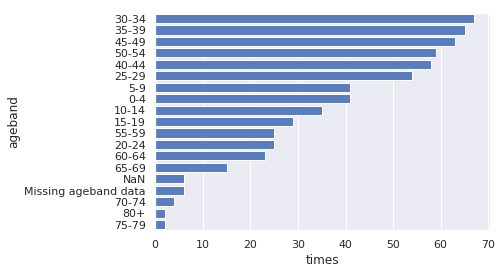

In [210]:
a=home_data['ageband1']
b=home_data['ageband2']
c=home_data['ageband3']
d=home_data['ageband4']

e=pd.concat([a,b,c,d])

f=e.value_counts()
count = pd.DataFrame(data=f)
g=count.reset_index()
g.columns = ['ageband', 'times']

sns.set_color_codes("muted")
sns.barplot(x="times",y="ageband", data=g, color="b")

#### What I Found:
The majority part of age band is 25-55. And there are few participants over 70.

### Exploratory Visualisations - 5
This plot shows the relathionship between abge band and average income.

In [211]:
home_data.head()
ageband_1 = home_data["ageband1"].copy()
re.split('-', ageband_1[5])
n = ageband_1.shape[0]
for i in range(n):
    if(ageband_1[i] == "80+"):
        ageband_1[i] = "80"
    firstnumber = ageband_1[i].split("-")[0]
    firstnumber = int(firstnumber)
    ageband_1[i] = firstnumber

In [212]:
home_data["ageband1_int"] = ageband_1

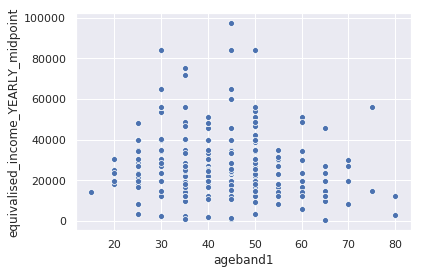

In [213]:
sns.scatterplot(x = ageband_1, y = home_data["equivalised_income_YEARLY_midpoint"], data = home_data)

#### What I Found:
From the plot, there are no relationship between this two things.

## Part 3 - Reflect and Hypothesise

- From the `Exploratory Visualisations - 1` distribution plot, the average energy, used by electric shower, is around 1000. And half of the show energy is lower than 1000. This may be influenced by the shower time of residents. The shower time distribution graph shows that more than half of the participants take a shower within 10 minutes. Few people will take a shower over 20 minutes. 

- From the `Exploratory Visualisations - 2`, the heater energy used by residents may be affected by the temperature of the day. The period of high frequency using heater may is in the winter. 

- From the `Exploratory Visualisations - 3`, the electronic usage of the shower below 1000 may have young children （0-5）and eldly(60+) people in the home, and one of residents may be on a business trip offen or study in the boarding school.

​    **Hypothesis 1: ** in the `Exploratory Visualisations - 3` the 2-residents home which `watt_mean`under 500 may have low income. Expect some missing data; people may save some money by decrease the frequency of taking a shower. We can find the homeid to look up the income in home_data.

​    **Hypothesis 2: **From the `Exploratory Visualisations - 3` 3-residents home's average energy of shower is around 1250 which may be closed to the medium of 2-residents home's shower energy using. It may because the third people is a child in young age who needs a few waters to shower. We can find the homid then use it to look up the age band from `home_data`.

​    **Hypothesis 3:** in the `Exploratory Visualisations - 4`, it could be divided into two group, one is 25-55, and other. In my opinion, other's shower time is more than the shower. it is because there are many old and young people in this group then, It could more time to take care or these two kinds of people. 